# **Data Collection**

## Objectives

* Clean the datasets
* Handling null value

## Inputs

* Kaggle JSON file - download Kaggle data

## Outputs

* Generate Datasets:
** /inputs/housing-prices-data/house-price-20211124T154130Z-001/house-price/house_prices_records.csv
** /inputs/housing-prices-data/house-price-20211124T154130Z-001/house-price/inherited_houses.csv

## Additional Comments




---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project_05/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/Project_05'

# Load data

In [5]:
import pandas as pd
df = pd.read_csv(f"/workspace/Project_05/inputs/housing-prices-data/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Data exploration

# Overview

---

+ Overview of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

## Missing data
+ by using df.isnull.sum(), as can be seen there are couple of missing datas, those are 2ndFlrSF, BedroomAbvGr, EnclosedPorch, GarageFinish, GarageYrBlt, LotFrontage, and LotFrontage


In [7]:
df.isnull().sum()

1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure        0
BsmtFinSF1          0
BsmtFinType1      114
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      162
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

## Filling the missing data
**Observation**
+ Using average to fill null value continue variable
+ Using model to fill the null value of categorical variable

In [8]:
for feature in df.columns:
  if df[feature].dtype == "object" :
    df[feature] = df[feature].fillna(df[feature].mode()[0])
  else :
    df[feature] = df[feature].fillna(df[feature].mean())

In [9]:
df.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtUnfSF        0
EnclosedPorch    0
GarageArea       0
GarageFinish     0
GarageYrBlt      0
GrLivArea        0
KitchenQual      0
LotArea          0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
OverallCond      0
OverallQual      0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
SalePrice        0
dtype: int64

## Dimension reduction

+ In this section will be reducing the number of column so the data easier to read and understand.

<AxesSubplot:>

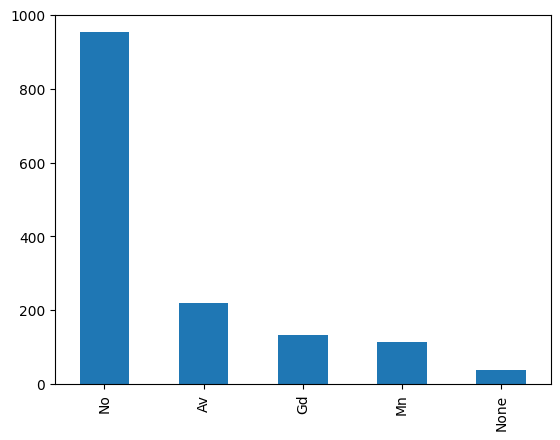

In [10]:
df['BsmtExposure'].value_counts().plot.bar()

+ as can be seen the data has been spread too thin

In [14]:
df["BsmtExposure"]=df['BsmtExposure'].replace(["Av","Gd","Mn","None"],"Yes")

<AxesSubplot:>

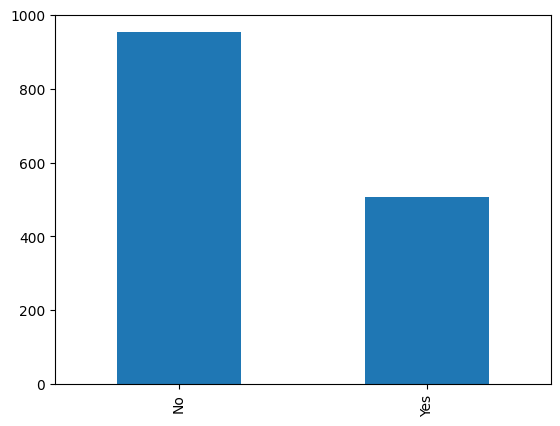

In [15]:
df['BsmtExposure'].value_counts().plot.bar()

+ with this code, the graph will be combining Av, Gd, Mn, and None together.
+ Replace it with "Yes"

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [11]:
import os
try:
  os.makedirs(name='/outputs/datasets/collection')
except Exception as e:
  print(e)

df.to_csv(f"/outputs/datasets/collection/HousePrices.csv",index=False)


[Errno 13] Permission denied: '/outputs'


OSError: Cannot save file into a non-existent directory: '/outputs/datasets/collection'